# Student Study Performance

## Import Libraries

In [438]:
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import torch
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler 
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Reading Data

In [439]:

df = pd.read_csv('D:\\iaaa\\tamrina\\tamrin_5\\example\\study_performance.csv')

## EDA

In [440]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


number of unique values:

In [441]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [442]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [444]:
for i in df.columns:
 if i == "math_score" :
   break
 print(f"{i}'s categories => {df[i].unique()}")

gender's categories => ['female' 'male']
race_ethnicity's categories => ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education's categories => ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch's categories => ['standard' 'free/reduced']
test_preparation_course's categories => ['none' 'completed']


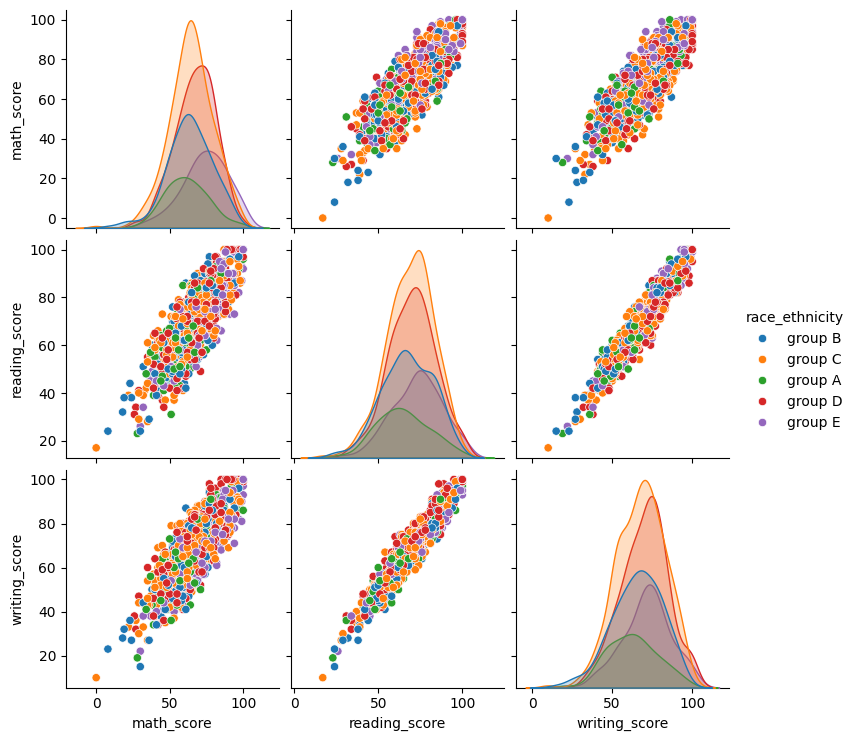

In [445]:
X = df
sns.pairplot(df, hue='race_ethnicity')
plt.show()

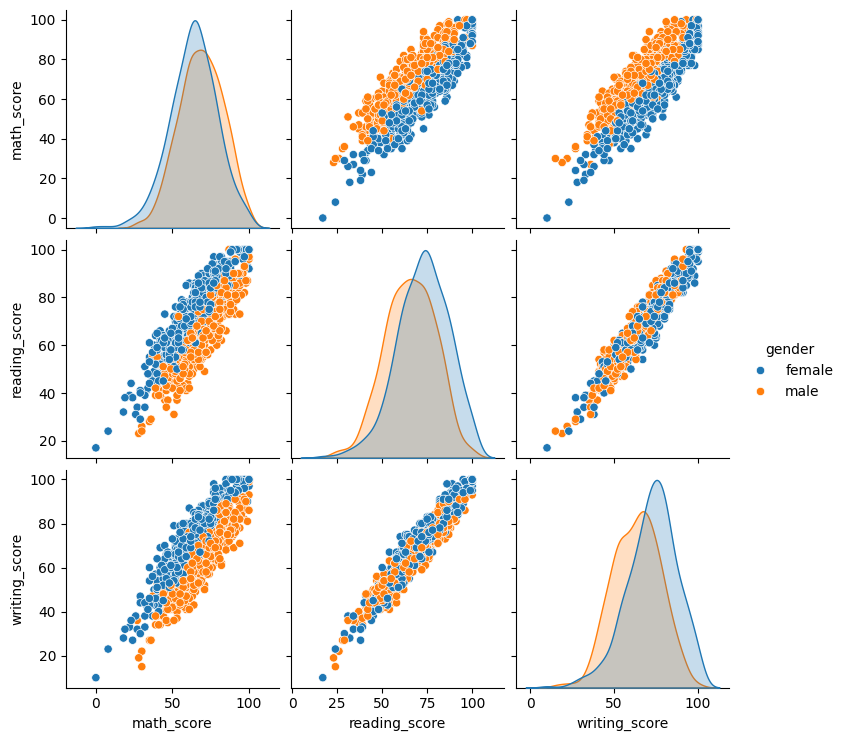

In [446]:
X = df
sns.pairplot(df, hue='gender')
plt.show()

In [447]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot:xlabel='average', ylabel='Count'>

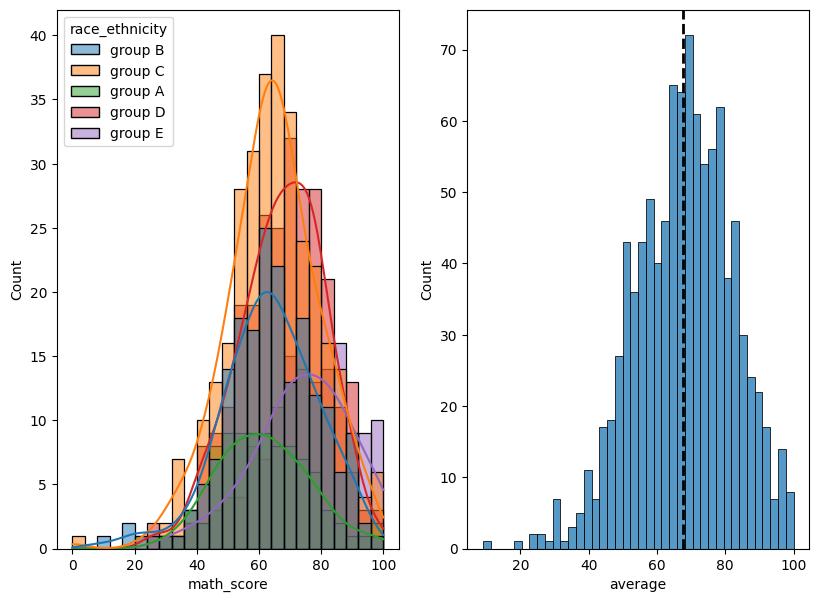

In [448]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df, x="math_score",kde=True, hue="race_ethnicity" )
plt.subplot(132)
plt.axvline(df['average'].mean(), color='k', linestyle='dashed', linewidth=2)
sns.histplot(data=df,x='average',bins=40)

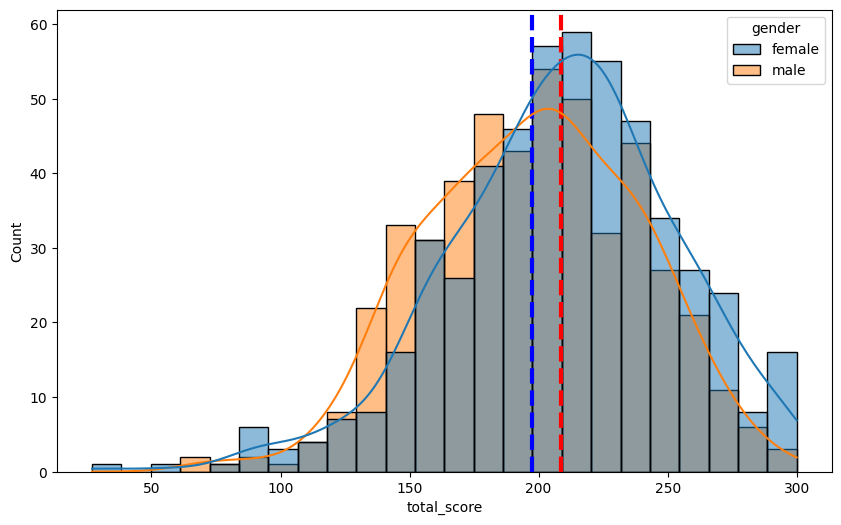

In [449]:
plt.subplots(figsize=(10,6))
plt.subplot()
plt.axvline(df[df.gender=='female']['total_score'].mean(), color='r', linestyle='dashed', linewidth=3 )
plt.axvline(df[df.gender=='male']['total_score'].mean(), color='b', linestyle='dashed', linewidth=3)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

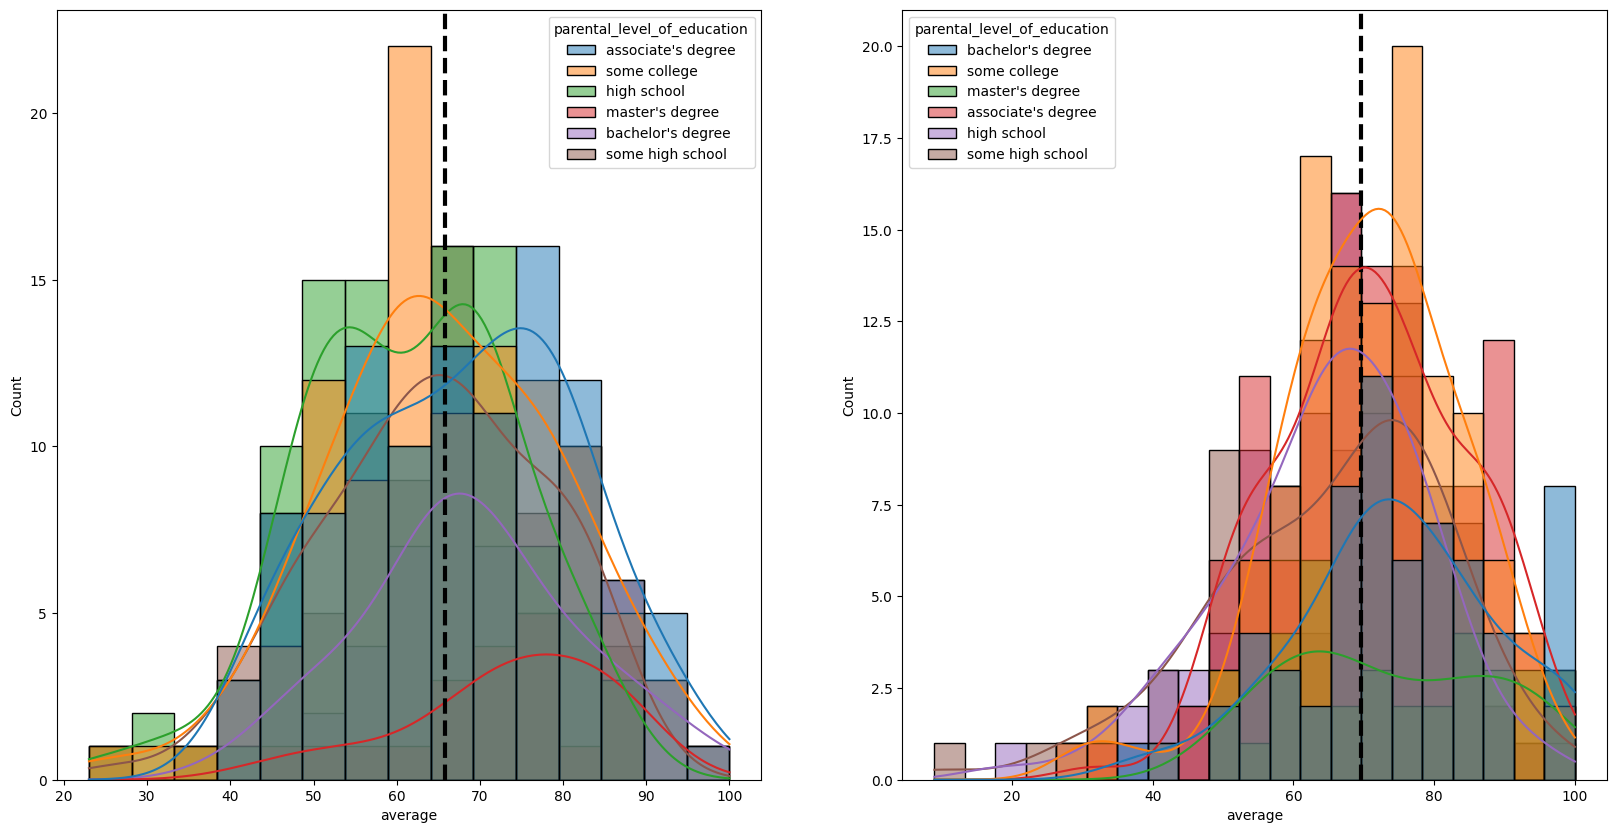

In [450]:
plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.axvline(df[df.gender=='male']['average'].mean(), color='k', linestyle='dashed', linewidth=3)
plt.subplot(122)
plt.axvline(df[df.gender=='female']['average'].mean(), color='k', linestyle='dashed', linewidth=3)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [451]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [452]:
object_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']

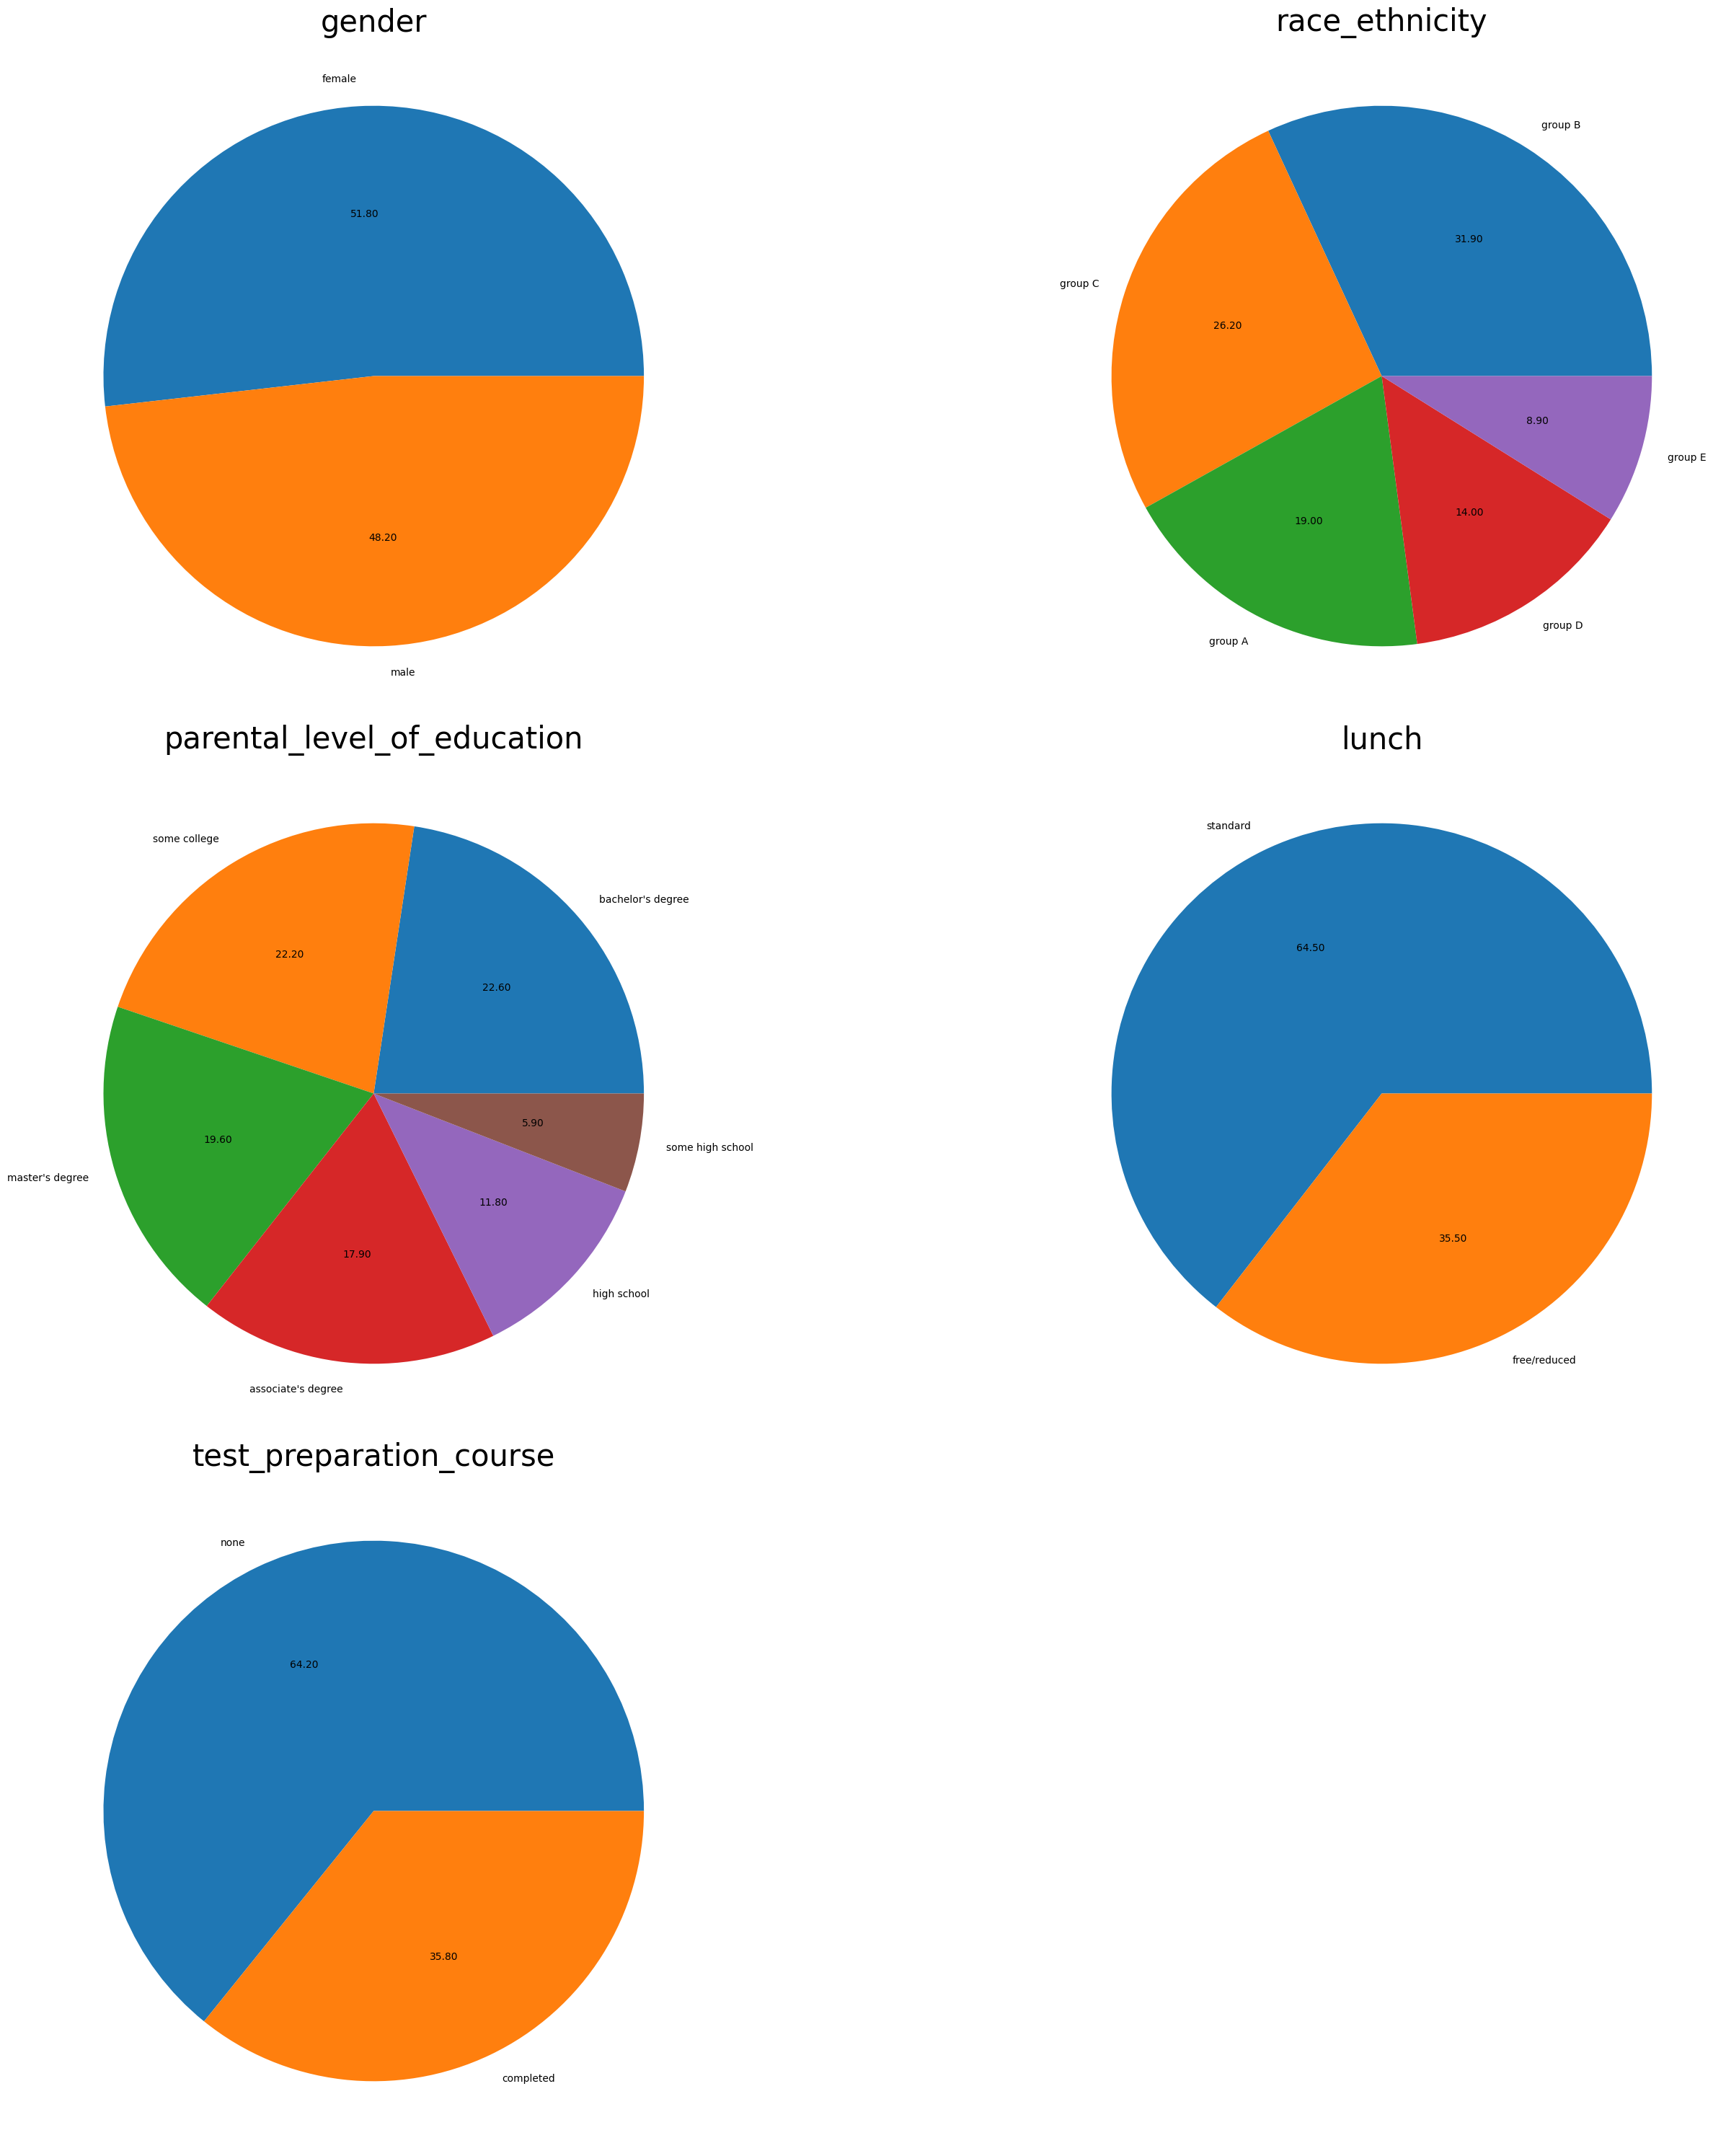

In [453]:
plt.rcParams['figure.figsize'] = (30, 30)
for i,c in enumerate(object_columns):
 plt.subplot(3, 2,i+1)
 size = df[c].value_counts()
 labels = df[c].unique()

 plt.pie(size,  labels = labels,autopct = '%.2f')
 plt.title(c, fontsize = 30)
 plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

E:\User\Negar\AppData\Local\Temp\ipykernel_18336\3850767057.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


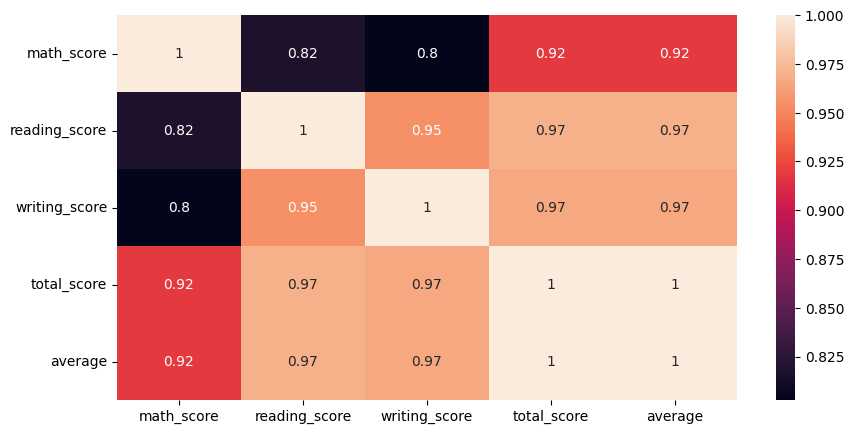

In [454]:

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data Preprocessing

spliting numeric and categorical features

In [455]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [456]:
numeric_features = df.drop('average', axis=1).select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.drop('average', axis=1).select_dtypes(include=['object']).columns
X = df.drop('average', axis=1)
Y = df['average']

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [458]:
numeric_features

Index(['math_score', 'reading_score', 'writing_score', 'total_score'], dtype='object')

In [459]:
categorical_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [460]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)])

In [461]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [462]:
X_train_tensor = torch.tensor(X_train_processed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Reshape to column vector
X_test_tensor = torch.tensor(X_test_processed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)  # Reshape to column vector
X_train_tensor

tensor([[-0.2995,  0.0308,  0.4341,  ...,  0.0000,  1.0000,  1.0000],
        [-0.0331,  0.9303,  0.9647,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.8328,  1.3454,  1.1637,  ...,  0.0000,  0.0000,  1.0000],
        ...,
        [-0.8989, -0.5227, -1.0252,  ...,  0.0000,  1.0000,  1.0000],
        [-1.0987, -1.4914, -1.0252,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.2324,  1.4838,  1.3627,  ...,  0.0000,  1.0000,  1.0000]])

## Model Building

In [463]:
class MLPRegression(nn.Module):
    def __init__(self, input_size, hidden_size1 ,hidden_size2 ,hidden_size3,output_dim ):
        super(MLPRegression, self).__init__()
        # Define the first fully connected layer
        self.fc1 = nn.Linear(input_size, hidden_size1)
        # Define the second fully connected layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        # Define the third fully connected layer
        self.fc4 = nn.Linear(hidden_size3, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Apply ReLU activation function after the first and second layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # No activation function is applied to the output layer in regression
        x = self.fc4(x)
        return x

## Training

In [464]:
model = MLPRegression(X_train_tensor.shape[1],256, 128, 64, 1)

In [465]:
model

MLPRegression(
  (fc1): Linear(in_features=16, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [466]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_losses = []
test_losses = []


In [467]:
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
#     print(f'Input shape: {X_train_tensor.shape}')
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test_tensor)
            test_loss = criterion(y_pred, y_test_tensor)
            test_losses.append(test_loss)
            train_losses.append(loss.float())
        print(f'Epoch [{epoch+1}/{num_epochs}] | Train_Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f} ')

Epoch [10/5000] | Train_Loss: 4694.7520 | Test Loss: 4424.7314 
Epoch [20/5000] | Train_Loss: 4185.6895 | Test Loss: 3892.1562 
Epoch [30/5000] | Train_Loss: 2853.0393 | Test Loss: 2562.7385 
Epoch [40/5000] | Train_Loss: 779.7857 | Test Loss: 696.7003 
Epoch [50/5000] | Train_Loss: 466.9858 | Test Loss: 532.0712 
Epoch [60/5000] | Train_Loss: 204.5312 | Test Loss: 239.9768 
Epoch [70/5000] | Train_Loss: 209.4627 | Test Loss: 242.0333 
Epoch [80/5000] | Train_Loss: 147.0422 | Test Loss: 172.9689 
Epoch [90/5000] | Train_Loss: 132.1777 | Test Loss: 154.6125 
Epoch [100/5000] | Train_Loss: 116.2893 | Test Loss: 139.5916 
Epoch [110/5000] | Train_Loss: 103.2571 | Test Loss: 119.9768 
Epoch [120/5000] | Train_Loss: 93.7023 | Test Loss: 107.7437 
Epoch [130/5000] | Train_Loss: 85.1530 | Test Loss: 98.9072 
Epoch [140/5000] | Train_Loss: 77.6515 | Test Loss: 89.8373 
Epoch [150/5000] | Train_Loss: 71.0609 | Test Loss: 82.3309 
Epoch [160/5000] | Train_Loss: 65.1333 | Test Loss: 75.8134 
Epoc

In [470]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.3494


In [435]:
import torch
t = torch.tensor(train_losses, requires_grad=True)
t_detached = t.detach().numpy()


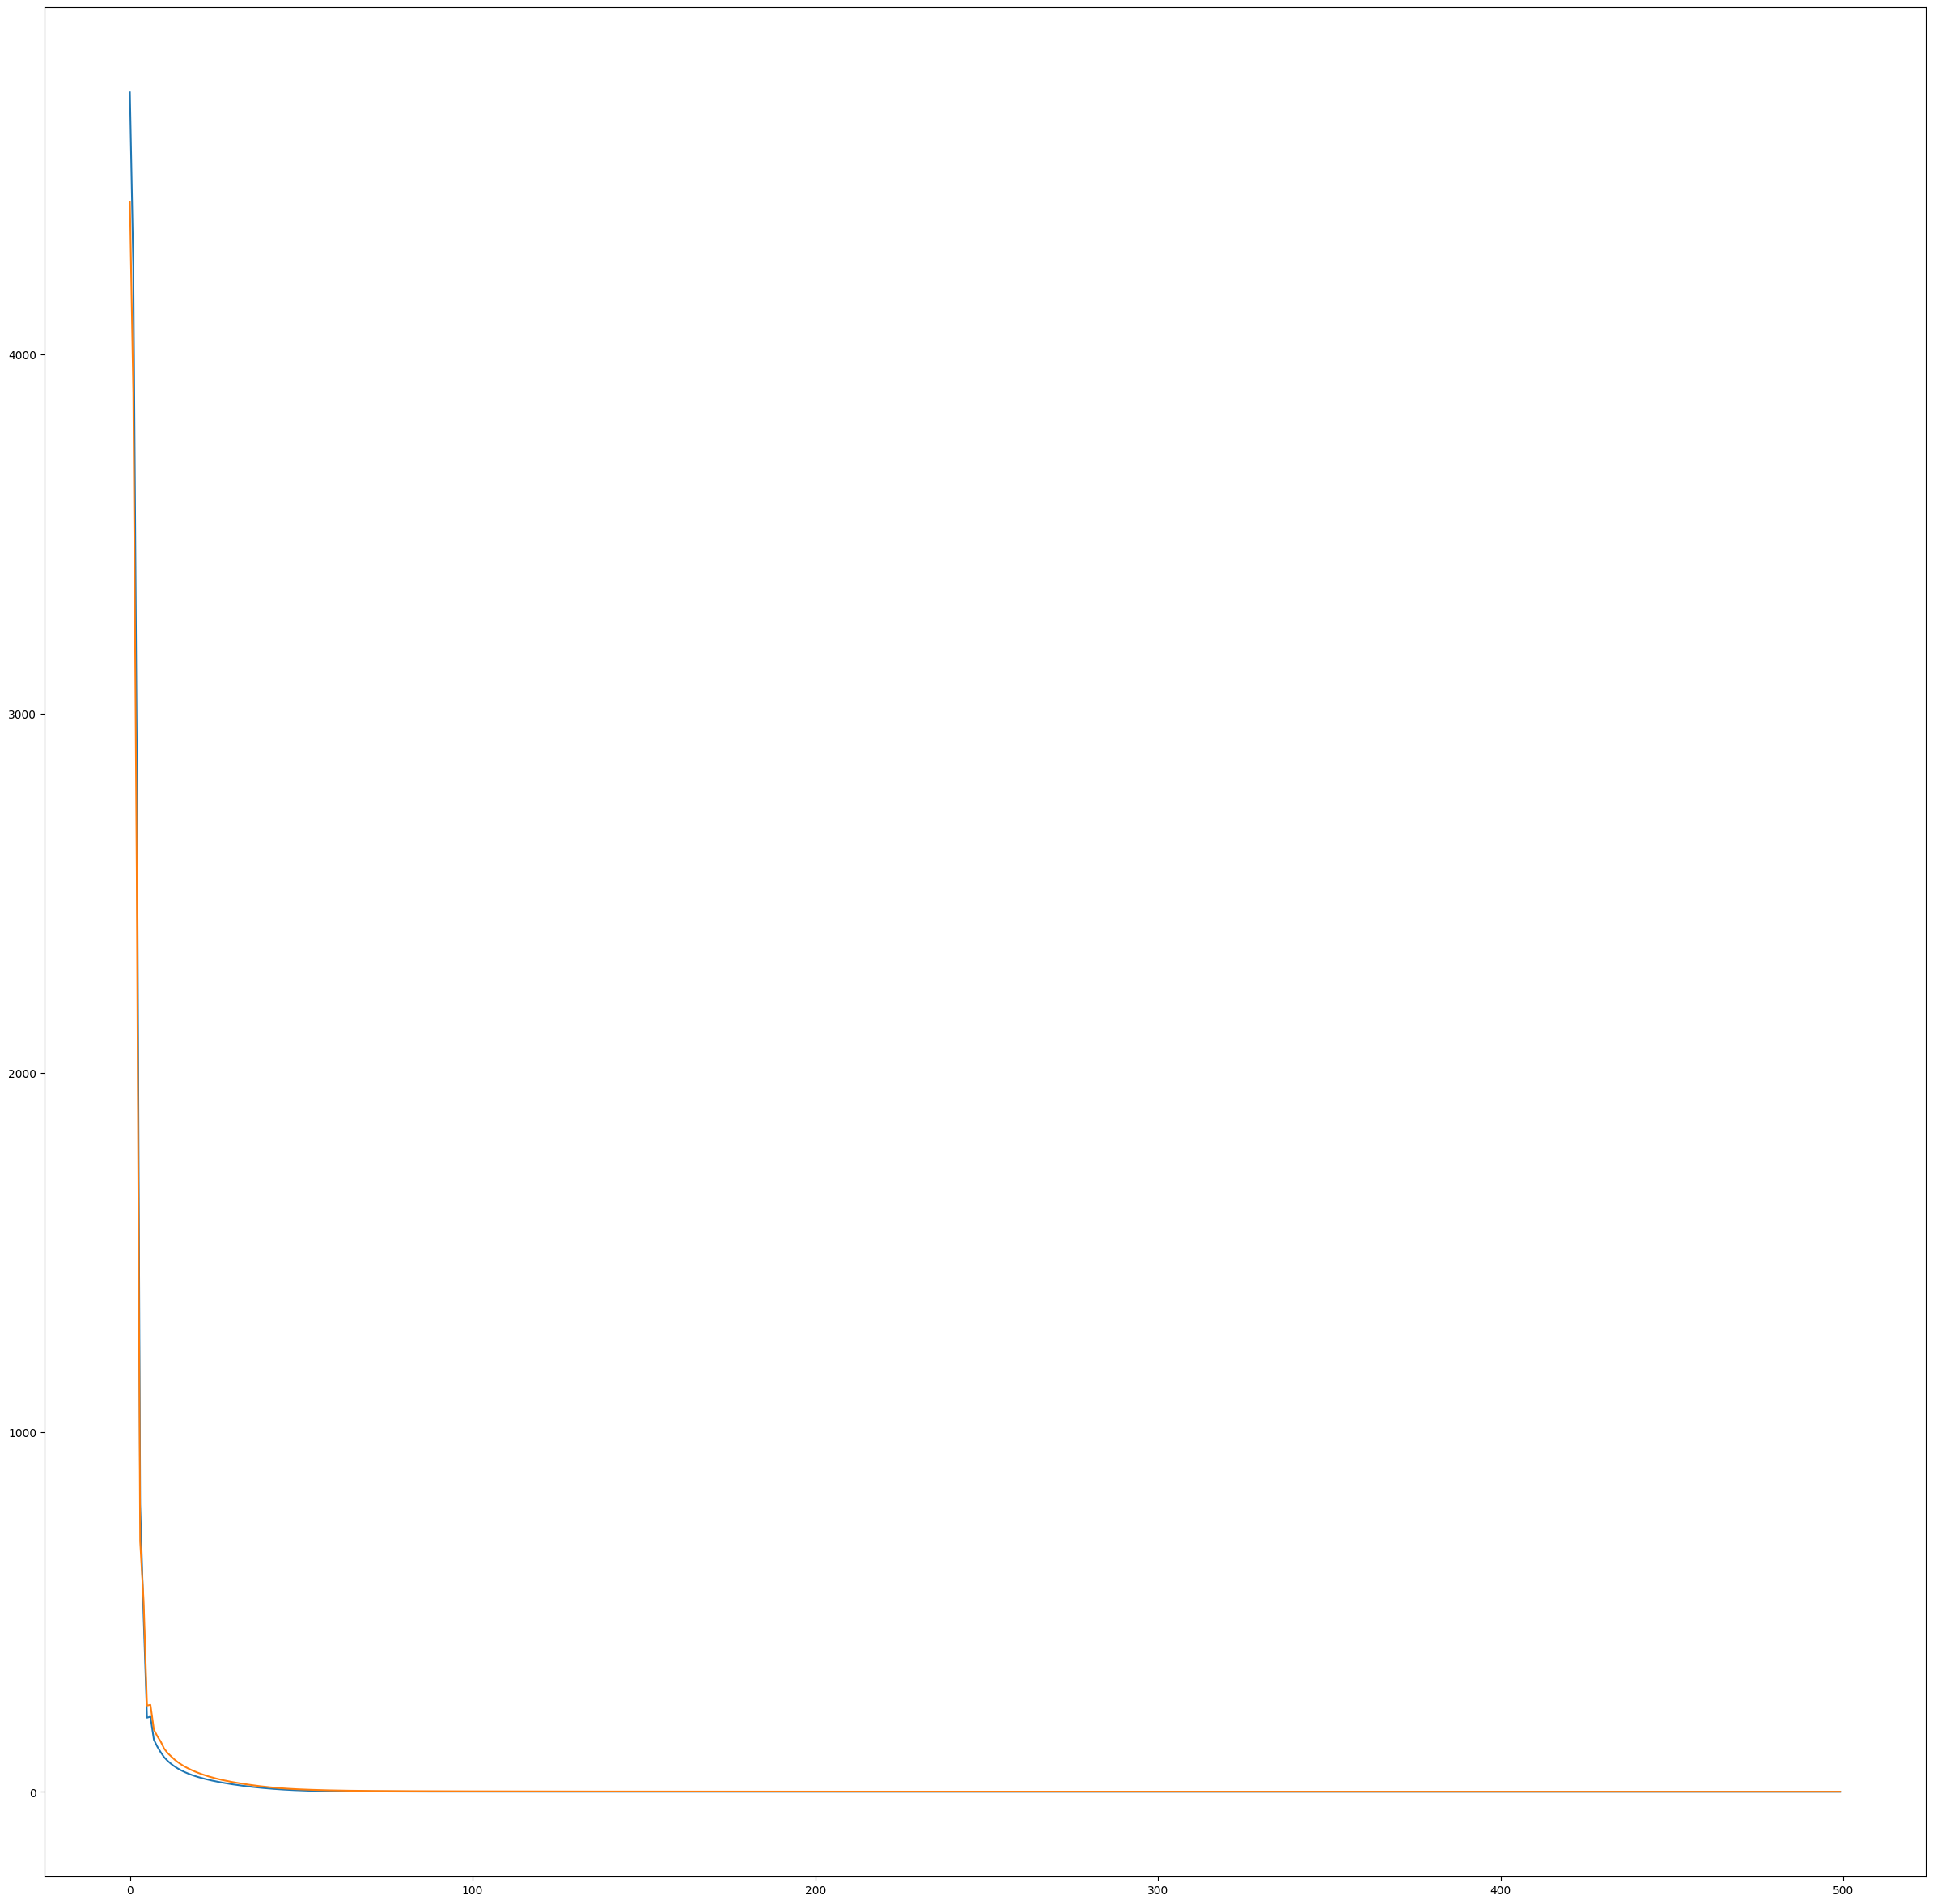

In [472]:
import matplotlib.pyplot as plt
plt.plot(t_detached )
plt.plot(test_losses)
plt.show()

In [358]:
mae_loss = nn.L1Loss()
output_tensor = mae_loss(y_pred, y_test_tensor)
print("MAE loss:", output_tensor.item())

MAE loss: 0.2580341398715973


In [153]:
epochs = 5000
for epoch in range(epochs):
    model.train()
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(X_train_tensor)

    # Compute and print loss
    loss = criterion(y_pred, y_train_tensor)
    print(f'Epoch {epoch + 1}/{epochs}, test_Loss: {loss.item()}')
    train_losses.append(loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epochs%10 == 0:
        model.eval()
        y_pred = model(X_test_tensor)
        loss = criterion(y_pred, y_test_tensor)
        test_losses.append(loss.item())

Epoch 1/5000, test_Loss: 0.0009551960974931717
Epoch 2/5000, test_Loss: 1.6256338357925415
Epoch 3/5000, test_Loss: 0.062213025987148285
Epoch 4/5000, test_Loss: 1.2305642366409302
Epoch 5/5000, test_Loss: 1.0101906061172485
Epoch 6/5000, test_Loss: 0.1931154429912567
Epoch 7/5000, test_Loss: 0.13932593166828156
Epoch 8/5000, test_Loss: 0.5337812304496765
Epoch 9/5000, test_Loss: 0.6165493130683899
Epoch 10/5000, test_Loss: 0.3604815602302551
Epoch 11/5000, test_Loss: 0.10261788964271545
Epoch 12/5000, test_Loss: 0.09631320834159851
Epoch 13/5000, test_Loss: 0.26547539234161377
Epoch 14/5000, test_Loss: 0.35307446122169495
Epoch 15/5000, test_Loss: 0.24392299354076385
Epoch 16/5000, test_Loss: 0.0736026018857956
Epoch 17/5000, test_Loss: 0.030745021998882294
Epoch 18/5000, test_Loss: 0.1257537305355072
Epoch 19/5000, test_Loss: 0.2099253088235855
Epoch 20/5000, test_Loss: 0.17073999345302582
Epoch 21/5000, test_Loss: 0.06172200292348862
Epoch 22/5000, test_Loss: 0.009683052077889442
Ep

In [ ]:
target_columns = [ 'math_score', 'reading_score','writing_score']

In [ ]:
le = LabelEncoder()
df = df.copy()
for c in object_columns:
  df[c] = le.fit_transform(df[c])

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(target_columns, axis=1)
y = df[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train) 
y_train_scaled = scaler.fit_transform(y_train)
# X_test_scaled = scaler.transform(X_test)
y_test_scaled = scaler.transform(y_test)

In [ ]:
X_train_scaled

array([[-0.96559161,  0.70245445,  0.82295708, ...,  0.73581643,
         0.9897587 ,  0.9897587 ],
       [-0.96559161, -0.15159351,  0.82295708, ...,  0.73581643,
        -0.46530178, -0.46530178],
       [ 1.03563452,  0.70245445,  0.82295708, ...,  0.73581643,
        -0.88103335, -0.88103335],
       ...,
       [-0.96559161,  0.70245445, -0.26976602, ...,  0.73581643,
        -1.5277269 , -1.5277269 ],
       [-0.96559161, -0.15159351, -1.36248912, ..., -1.35903462,
         1.0128549 ,  1.0128549 ],
       [-0.96559161, -0.15159351, -1.36248912, ...,  0.73581643,
        -0.69626376, -0.69626376]])

In [ ]:
x_data_train = Variable(torch.from_numpy(np.array(X_train)))
y_data_train = Variable(torch.from_numpy(np.array(y_train)))
x_data_test = Variable(torch.from_numpy(np.array(X_test)))
y_data_test = Variable(torch.from_numpy(np.array(y_test)))

In [ ]:
mlp_regression = MLPRegression(5,25)
mlp_regression

MLPRegression(
  (fc1): Linear(in_features=5, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=25, bias=True)
  (fc3): Linear(in_features=25, out_features=3, bias=True)
)

In [ ]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(mlp_regression.parameters(), lr=0.001)
train_losses = []
test_losses = []


In [ ]:
x_data_train

tensor([[  0.0000,   3.0000,   4.0000,  ...,   1.0000, 246.0000,  82.0000],
        [  0.0000,   2.0000,   4.0000,  ...,   1.0000, 183.0000,  61.0000],
        [  1.0000,   3.0000,   4.0000,  ...,   1.0000, 165.0000,  55.0000],
        ...,
        [  0.0000,   3.0000,   2.0000,  ...,   1.0000, 137.0000,  45.6667],
        [  0.0000,   2.0000,   0.0000,  ...,   0.0000, 247.0000,  82.3333],
        [  0.0000,   2.0000,   0.0000,  ...,   1.0000, 173.0000,  57.6667]],
       dtype=torch.float64)

In [ ]:
y_data_train

tensor([[79, 86, 81],
        [54, 64, 65],
        [55, 58, 52],
        ...,
        [39, 52, 46],
        [75, 82, 90],
        [54, 58, 61]])

In [354]:
epochs = 1800
for epoch in range(epochs):
    mlp_regression.train()
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = mlp_regression(x_data_train.float())

    # Compute and print loss
    loss = criterion(y_pred, y_data_train.float())
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')
    train_losses.append(loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epochs%10 == 0:
        mlp_regression.eval()
        y_pred = mlp_regression(x_data_test.float())
        loss = criterion(y_pred, y_data_test.view(-1, 3).float())
        test_losses.append(loss.item())

NameError: name 'mlp_regression' is not defined

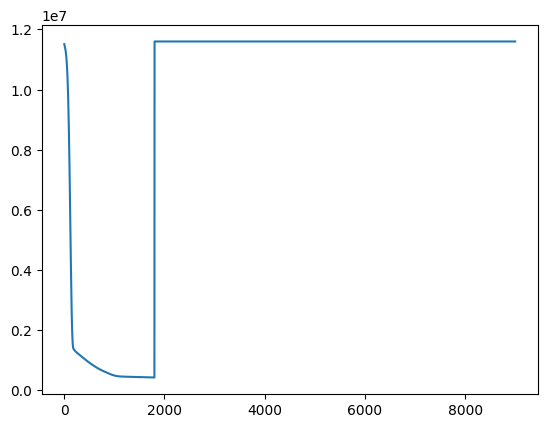

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses)
plt.show()

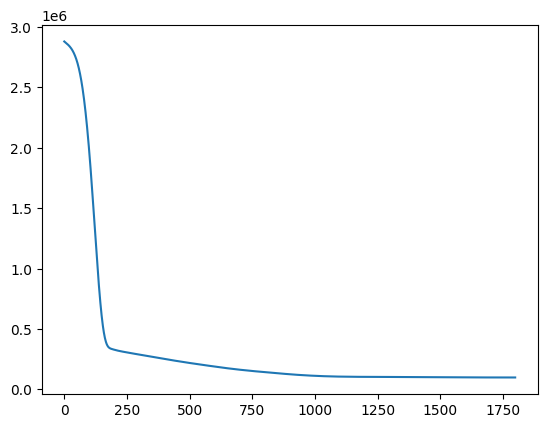

In [ ]:
plt.plot(test_losses)
plt.show()

## Evaluation:

In [ ]:
mlp_regression.eval()
y_pred = mlp_regression(x_data_test.float())
loss = criterion(y_pred, y_data_test.view(-1, 3).float())
print(loss.item())

NameError: name 'mlp_regression' is not defined

In [ ]:
mlp_regression.eval()
with torch.no_grad():
    y_pred = mlp_regression(x_data_test)
    test_loss = criterion(y_pred, y_data_test)
    print(f'Test Loss: {test_loss.item():.4f}')

NameError: name 'mlp_regression' is not defined

# Obesity Levels

## Data Preprocessing

## Model Building

## Training

## Evaluation: